In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import random
import numpy as np
from numpy.polynomial import Polynomial
import copy

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

from scipy.stats import norm 
import statistics as stats


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Note this adjusts the configuration of the plots we'll create

# Read in the data, variable name dataframe
print("Here is your random number: ")
print(random.randint(0,100))
df = pd.read_csv(r'C:\Users\erick\Downloads\archive\movies.csv')
print("Success. Continue to the next cell.")


Here is your random number: 
90
Success. Continue to the next cell.


In [2]:
# This looks at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We check now for any missing data within the dataframe.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Since there exists missing data, we will save such rows into an archive.
# This code checks for any records with null (NaN) values within the dataframe, and saves it into a dataframe archive.
# This could be saved for later if we retrieve the missing data.

null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
dfa = null_rows
dfa.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [5]:
# Now, we drop the rows with missing values from our original dataframe.

df = df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# This code will change the datatypes for columns votes, gross, and runtime.
df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce').fillna(0).astype('int64')
df['votes'] = pd.to_numeric(df['votes'], errors = 'coerce').fillna(0).astype('int64')
df['gross'] = pd.to_numeric(df['gross'], errors = 'coerce').fillna(0).astype('int64')
df['runtime'] = pd.to_numeric(df['runtime'], errors = 'coerce').fillna(0).astype('int64')  

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [9]:
# We'll now add a new column, correcting the year of the movie to match the year of its release.
df['yearfixed'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearfixed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [10]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearfixed
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


In [11]:
print('Start')
pd.set_option('display.max_rows', 10)
print('End')

Start
End


In [12]:
# This checks and drops any duplicate records
df['company'].drop_duplicates()#.sort_values(ascending=True)

0                              Warner Bros.
1                         Columbia Pictures
2                                 Lucasfilm
3                        Paramount Pictures
4                            Orion Pictures
                       ...                 
7604                         Emphatic Films
7616                 Hicktown Entertainment
7645                Clubhouse Pictures (II)
7651                   20th Century Studios
7652    Beijing Diqi Yinxiang Entertainment
Name: company, Length: 1475, dtype: object

Text(0.5, 1.0, 'Gross Income over Budget Expense')

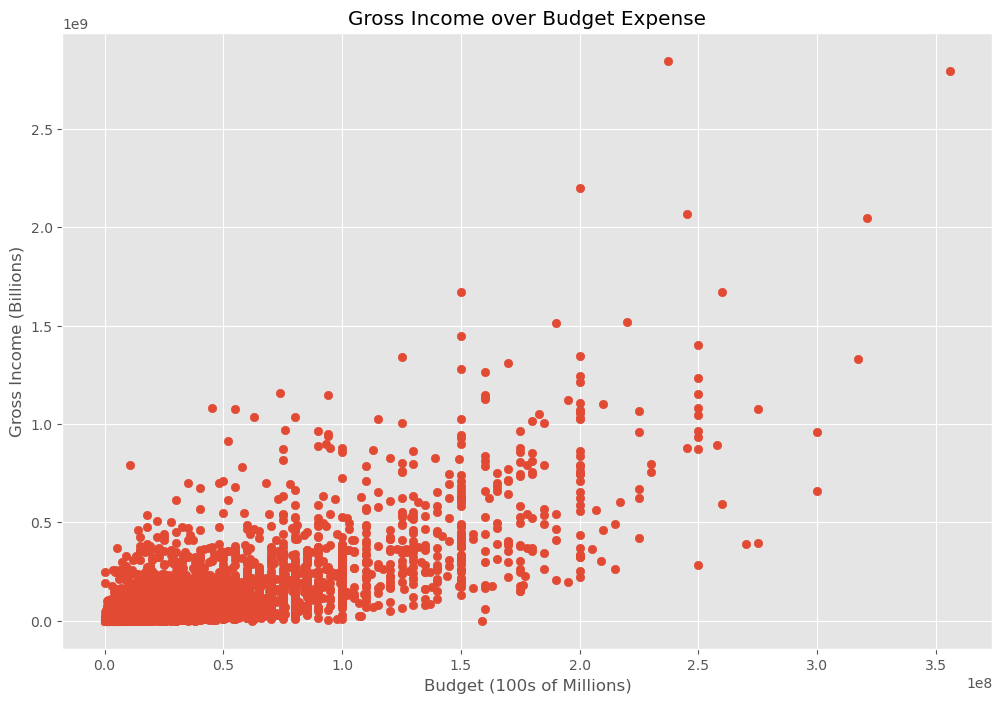

In [13]:

plt.scatter(x=df['budget'], y=df['gross'])
plt.xlabel('Budget (100s of Millions)')
plt.ylabel('Gross Income (Billions)')
plt.title('Gross Income over Budget Expense')

Text(0, 0.5, 'Gross Income (Billions)')

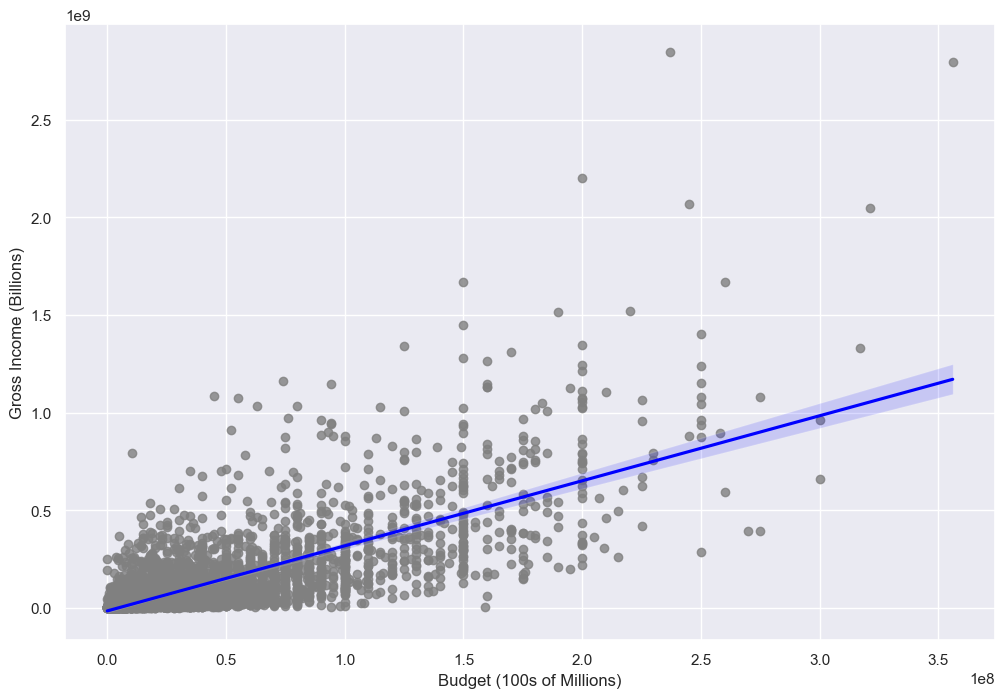

In [14]:
# This plots the above graph using Seaborn
sns.set_theme(style="darkgrid", palette="pastel")
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'grey'}, line_kws={'color':'blue'})
plt.xlabel('Budget (100s of Millions)')
plt.ylabel('Gross Income (Billions)')

In [15]:
# This looks for correlation between different columns
df.corr(method='kendall', numeric_only=True)

,year,score,votes,budget,gross,runtime,yearfixed
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearfixed,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [16]:
# Note that the above shows a fair correlation between gross and budget.

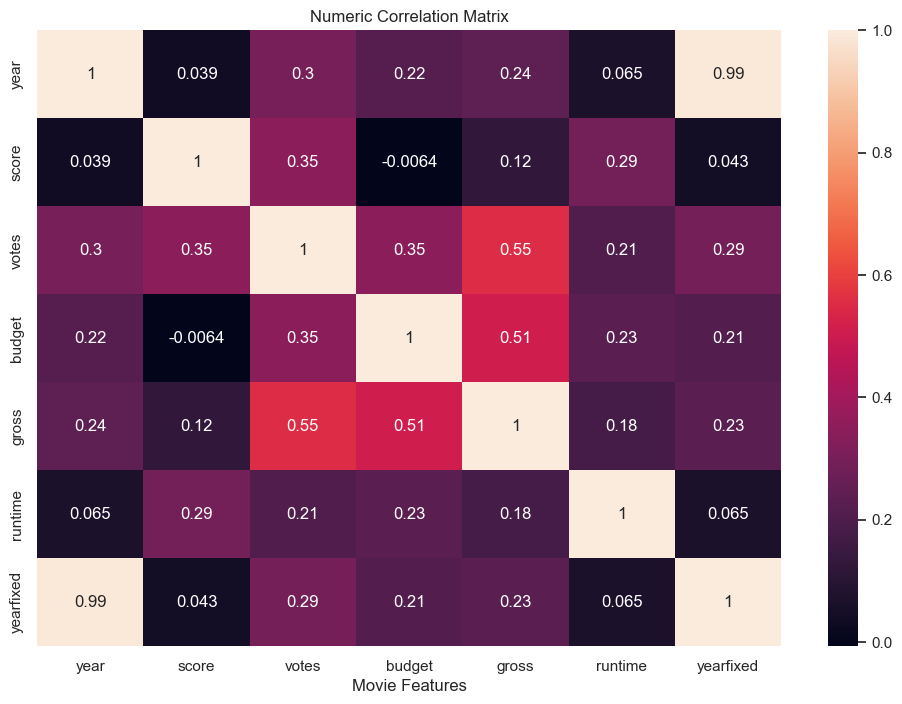

In [17]:
correlation_matrix = df.corr(method='kendall', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Numeric Correlation Matrix')
plt.xlabel('Movie Features')
plt.show()

In [18]:
df_numerized = df.copy(deep=True)
df = df

In [19]:
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
print('Finished')
df_numerized

Finished


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearfixed
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,2020
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,2020
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,2020
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100,2020


In [20]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearfixed
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


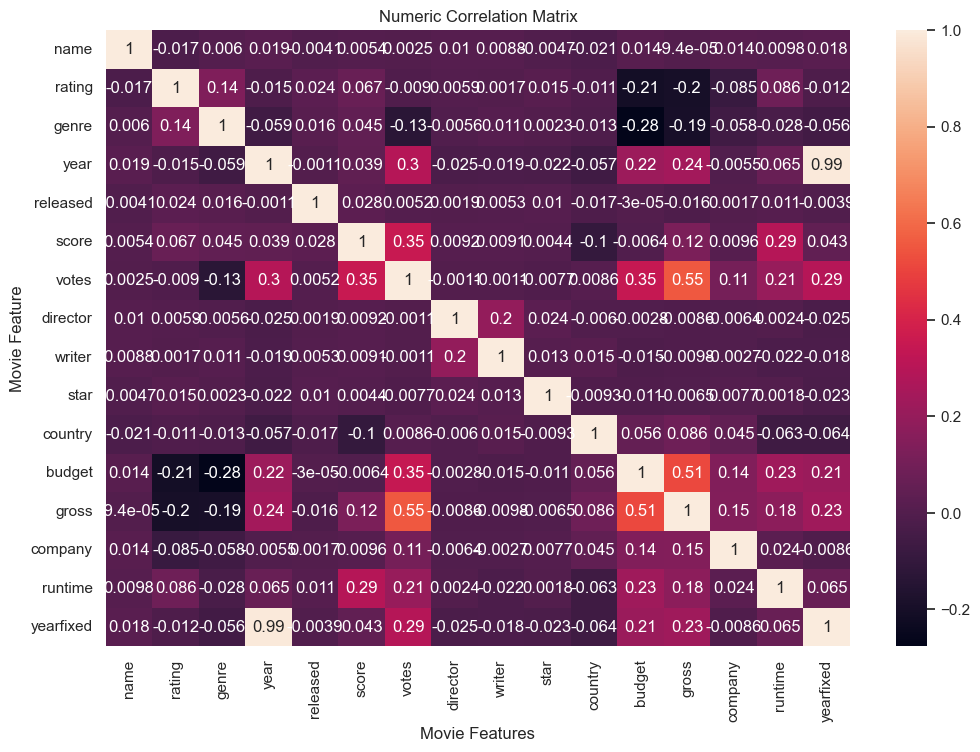

In [21]:
correlation_matrix = df_numerized.corr(method='kendall', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Numeric Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Feature')
plt.show()

In [22]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name       name         1.000000
           rating      -0.029234
           genre        0.010996
           year         0.025542
           released    -0.006152
                          ...   
yearfixed  budget       0.320312
           gross        0.268721
           company     -0.018806
           runtime      0.075294
           yearfixed    1.000000
Length: 256, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre      budget      -0.368523
budget     genre       -0.368523
gross      genre       -0.244101
genre      gross       -0.244101
rating     budget      -0.203946
                          ...   
year       year         1.000000
genre      genre        1.000000
rating     rating       1.000000
runtime    runtime      1.000000
yearfixed  yearfixed    1.000000
Length: 256, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross      votes        0.614751
votes      gross        0.614751
gross      budget       0.740247
budget     gross        0.740247
year       yearfixed    0.998726
                          ...   
           year         1.000000
genre      genre        1.000000
rating     rating       1.000000
runtime    runtime      1.000000
yearfixed  yearfixed    1.000000
Length: 22, dtype: float64

In [25]:
# See that the strongest correlation is between gross and budget, with a strong positive linear relationship. 
# Now, below we will see how strong the correlation is for two specific companies

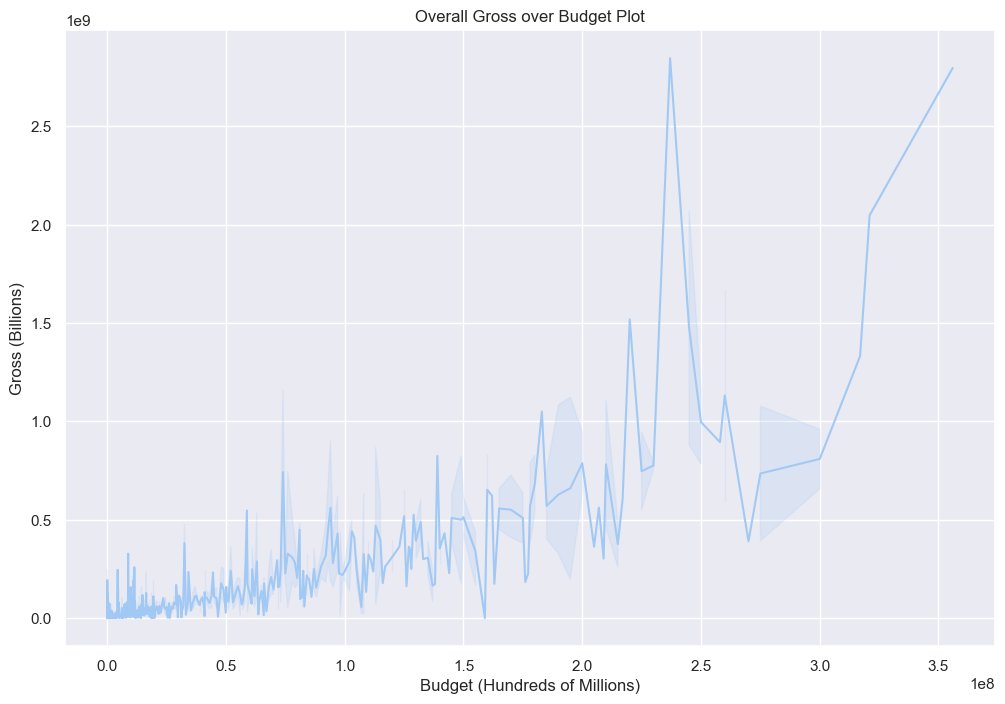

In [26]:
# Based on our correlation found above, both y-axes will be gross, and both x-axes will be budget from their respective company. 
# Below is an overall plot of the correlation
sns.lineplot(x="budget", y="gross", data=df)
plt.title('Overall Gross over Budget Plot')
plt.xlabel('Budget (Hundreds of Millions)')
plt.ylabel('Gross (Billions)')
plt.show()

In [27]:
# For a good comparison, we look for two companies with a large quantity of movies made
# We create a dataframe of unique companies
unique=df.drop_duplicates(subset=['company']).filter(items=['company'])
unique

,company
0,Warner Bros.
1,Columbia Pictures
2,Lucasfilm
3,Paramount Pictures
4,Orion Pictures
...,...
7604,Emphatic Films
7616,Hicktown Entertainment
7645,Clubhouse Pictures (II)
7651,20th Century Studios


In [28]:
# Now, add the number of movies for each movie
list = []
for row in unique.company:
    #print("{}".format(row).ljust(50), "#Movies: {}".format(df[df['company']==row].shape[0]))
    list.append(df[df['company']==row].shape[0])
unique['# of Movies'] = list
unique.sort_values(by=['# of Movies'], ascending=False)

,company,# of Movies
6,Universal Pictures,330
1,Columbia Pictures,302
0,Warner Bros.,298
3,Paramount Pictures,279
28,Twentieth Century Fox,209
...,...,...
3305,Cinépix Film Properties (CFP),1
3304,Intermedia Films,1
3302,Dollface,1
3298,Calimari Productions,1


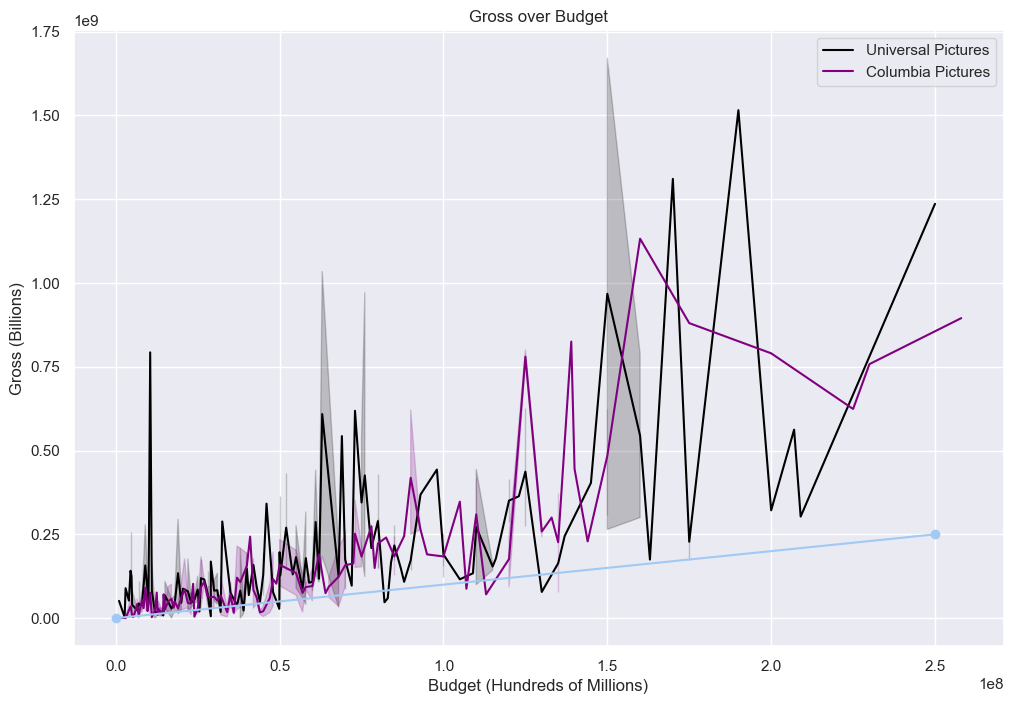

In [29]:
# Since Universal/Columbia Pictures have the most films, we choose them.
# This plots the two companies' movies, with respect to gross and budget.
dfclmb = df[df['company']=='Columbia Pictures'].copy(deep=True)
dfunpi = df[df['company']=='Universal Pictures'].copy(deep=True)

sns.lineplot(x="budget", y="gross", data=dfunpi, color='black', label='Universal Pictures')
sns.lineplot(x="budget", y="gross", data=dfclmb, color='purple', label='Columbia Pictures')

# Note this only checks to see that the majority of films performed above a 1:1 ratio
x,y = [0,250000000], [0,250000000]
plt.plot(x, y, marker='o')

plt.title('Gross over Budget')
plt.xlabel('Budget (Hundreds of Millions)')
plt.ylabel('Gross (Billions)')

plt.legend()
plt.show()

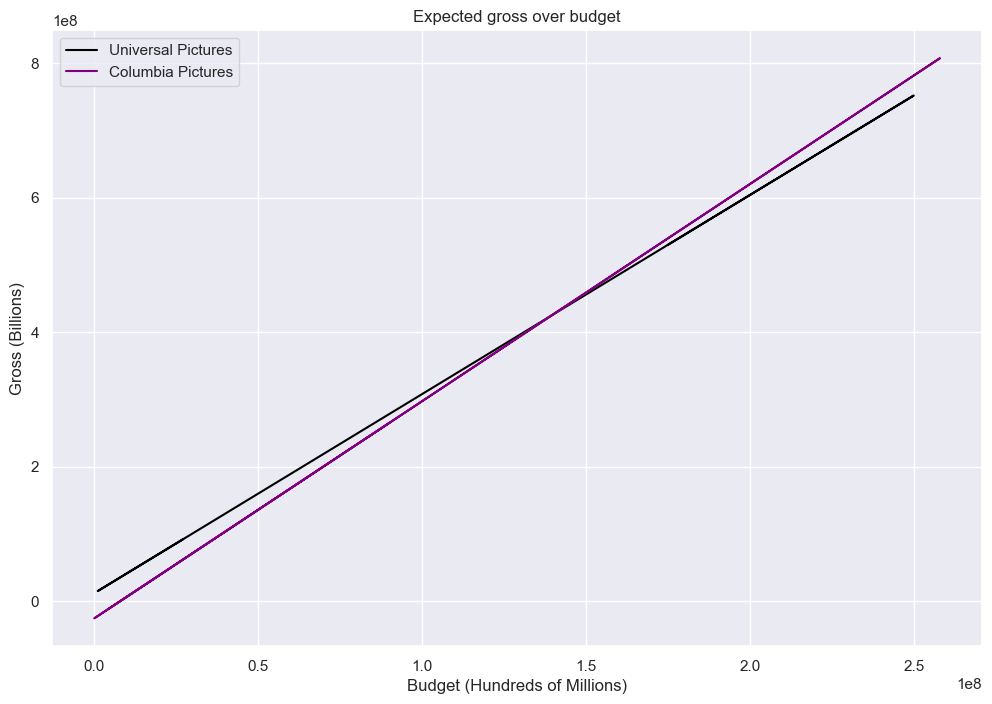

In [30]:
# This writes the regression line for the expected gross for a given budget
# for each respective company.
b1, m1 = Polynomial.fit(dfunpi['budget'], dfunpi['gross'], deg=1).convert()
b2, m2 = Polynomial.fit(dfclmb['budget'], dfclmb['gross'], deg=1).convert()
plt.plot(dfunpi['budget'], (m1*dfunpi['budget']) +b1, color='black', label='Universal Pictures')
plt.plot(dfclmb['budget'], (m2*dfclmb['budget']) +b2, color='purple', label='Columbia Pictures')
plt.title('Expected gross over budget')
plt.xlabel('Budget (Hundreds of Millions)')
plt.ylabel('Gross (Billions)')

plt.legend()
plt.show()
#plt.ylim(0, dfunpi['gross'].max()) # Y-axis range from 0 to highest grossing

In [31]:
# We see that the regression line will have difficulty distinguishing the gross earnings for both companies
# So, let's instead compare the ratios between them

In [32]:
# We check and save the ratio of gross over budget, and save it.
dfunpi['netratio'] = dfunpi['gross']/dfunpi['budget']
dfclmb['netratio'] = dfclmb['gross']/dfclmb['budget']

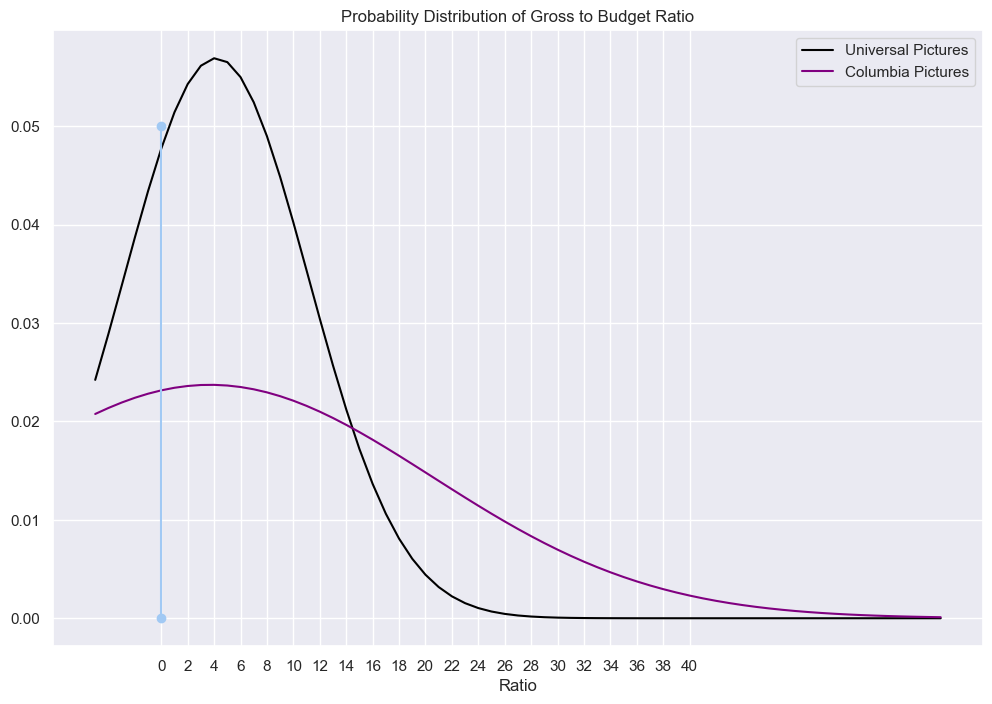

In [74]:
# Now, since both companies have more than 30 movies, we can assume normality, and can create a normal distribution
x_axis = np.arange(-5, 60, 1)
  
# Calculating mean and standard deviation 
mean1 = stats.mean(dfunpi['netratio']) 
sd1 = stats.stdev(dfunpi['netratio']) 
mean2 = stats.mean(dfclmb['netratio']) 
sd2 = stats.stdev(dfclmb['netratio']) 

plt.plot(x_axis, norm.pdf(x_axis, mean1, sd1), color='black', label='Universal Pictures') 
plt.plot(x_axis, norm.pdf(x_axis, mean2, sd2), color='purple', label='Columbia Pictures')
# Below plots a straight line vertically from x=0, as neither companies have a negative ratio
plt.plot([0,0], [0,.05], marker='o')

plt.title('Probability Distribution of Gross to Budget Ratio')
plt.xlabel('Ratio')
plt.xticks(range(0,41,2))
plt.legend()
plt.show() 

In [70]:
# We can infer that the that for both companies, the mean gross to budget ratio is about the same.
# Additionally, it looks a though there is a higher chance of Columbia Pictures netting a higher ratio

Text(0, 0.5, 'Ratio')

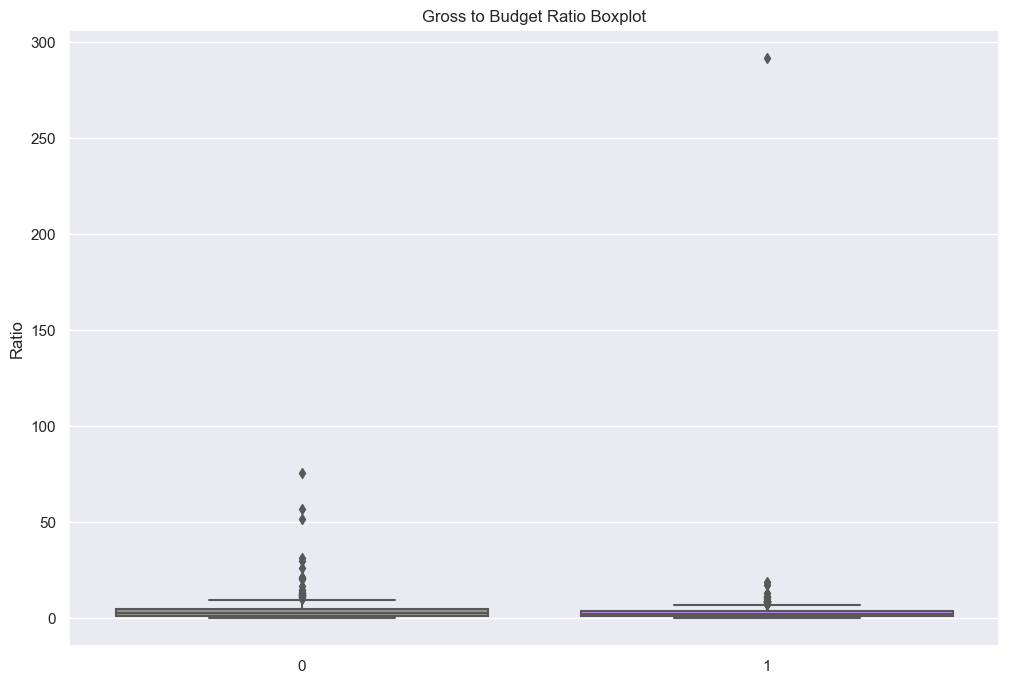

In [96]:
# This makes a boxplot of the data. Note x=0 is for Universal Pictures, and x=1 is for Columbia Pictures
sns.boxplot(data=[dfunpi['netratio'], dfclmb['netratio']], 
            palette=[sns.xkcd_rgb["grey"], sns.xkcd_rgb["light purple"]],
            showfliers=True)
plt.title('Gross to Budget Ratio Boxplot')
plt.ylabel('Ratio')

In [71]:
# There is a major outlier for Columbia Pictures, which would drastically affect our normal distribution.
# It is important to note that though both companies have outliers, Universal Pictures' outliers are generally higher than Columbia Pictures'.

([<matplotlib.axis.YTick at 0x1e771ef26d0>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9')])

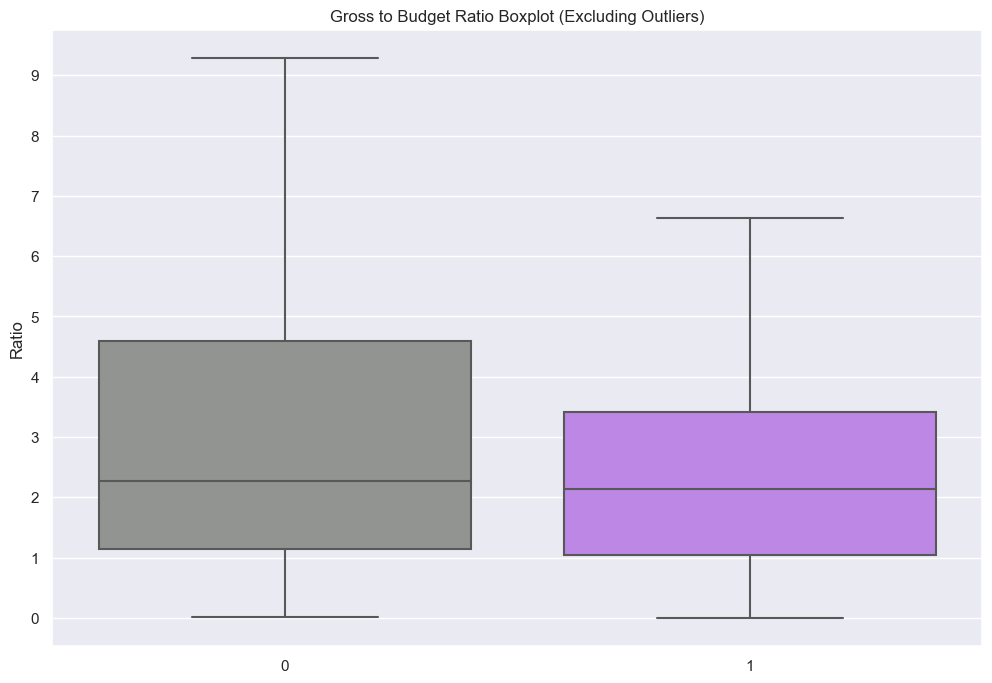

In [79]:
# This shows the boxplot of each, excluding outliers.
sns.boxplot(data=[dfunpi['netratio'], dfclmb['netratio']], 
            palette=[sns.xkcd_rgb["grey"], sns.xkcd_rgb["light purple"]],
            showfliers=False)
plt.title('Gross to Budget Ratio Boxplot (Excluding Outliers)')
plt.ylabel('Ratio')
plt.yticks(range(0,10,1))

In [80]:
# Looking at the top 25th percentile, we see that Universal Pictures actually has a higher ratio.
# Both companies have similar medians, but Universal Pictures has a larger range, as the final quartile
# goes up to above 9 ratio, while Columbia Pictures only goes up to slightly under 7.

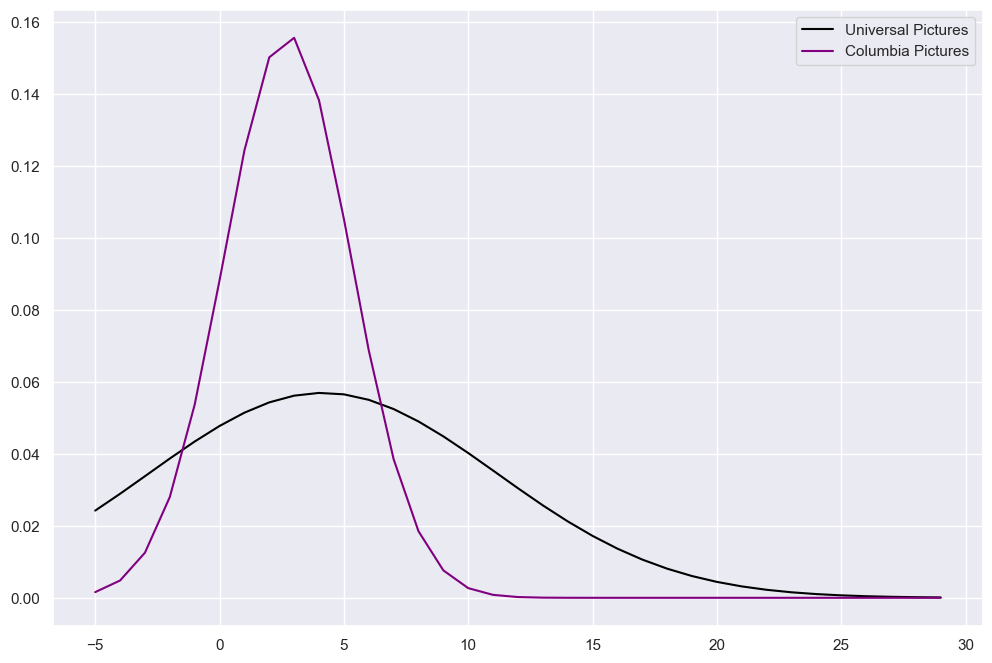

In [113]:
# This excludes the global outlier from Columbia Pictures

# These two lines determined the index of the global outlier, and dropped it. 
dfclmb.sort_values(by='netratio', ascending=False)
test=dfclmb.query("index != 2093")

x_axis = np.arange(-5, 30, 1)
mean = stats.mean(test['netratio']) 
sd = stats.stdev(test['netratio']) 
plt.plot(x_axis, norm.pdf(x_axis, mean1, sd1), color='black', label='Universal Pictures') 
plt.plot(x_axis, norm.pdf(x_axis, mean, sd), color='purple', label='Columbia Pictures')
plt.legend()

In [ ]:
# It is clear that the global outlier had a large influence on Columbia's normal distribution.
# With the modified data and the boxplot comparisons, Universal Studios is more likely to have a higher return for their movies.